<a href="https://colab.research.google.com/github/Thavatharani06/231801180_PODS/blob/main/x2_Data_Discovery_and_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape: (891, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Describe:
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN             

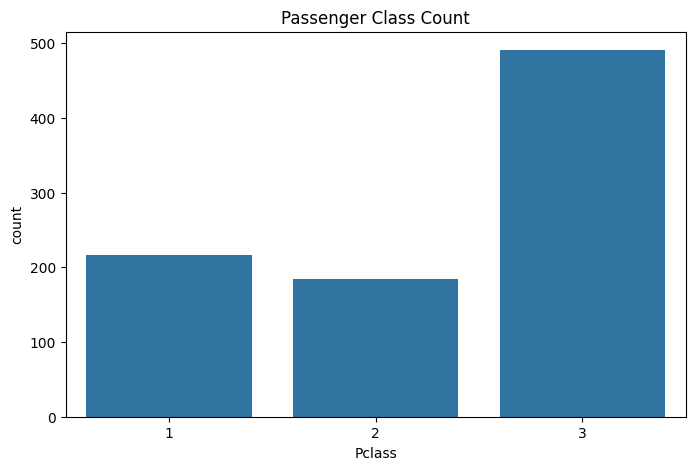


Female passengers who survived:
['Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 'Nasser, Mrs. Nicholas (Adele Achem)', 'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth', 'Hewlett, Mrs. (Mary D Kingcome) ', 'Masselmani, Mrs. Fatima', 'McGowan, Miss. Anna "Annie"', 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)', 'O\'Dwyer, Miss. Ellen "Nellie"', 'Spencer, Mrs. William Augustus (Marie Eugenie)', 'Glynn, Miss. Mary Agatha', 'Nicola-Yarred, Miss. Jamila', 'Laroche, Miss. Simonne Marie Anne Andree', 'Devaney, Miss. Margaret Delia', "O'Driscoll, Miss. Bridget", 'Harper, Mrs. Henry Sleeper (Myna Haxtun)', 'Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)', 'Rugg, Miss. Emily', 'West, Miss. Constance Mirium', 'Icard, Miss. Amelie', 'Nye, Mrs. (Elizabeth Ramell)', 'Andersson, Miss. Erna Alexandra', 'Dowdell, Miss. Elizabeth', 'McDermot

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nDescribe:")
print(df.describe(include='all'))

imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

df['Cabin'] = df['Cabin'].fillna('Unknown')

mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

plt.figure(figsize=(8,5))
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Count')
plt.show()

female_survived = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]['Name'].tolist()
print("\nFemale passengers who survived:")
print(female_survived)

pclass3_under18 = df[(df['Pclass'] == 3) & (df['Age'] < 18)]
print("\nPassengers in 3rd class and under age 18:")
print(pclass3_under18[['Name', 'Age', 'Pclass']])

pclass1_over40 = df[(df['Pclass'] == 1) & (df['Age'] > 40)]
print("\nPassengers in 1st class and older than 40:")
print(pclass1_over40[['Name', 'Age', 'Pclass']])

pclass1_over40_survived = pclass1_over40[pclass1_over40['Survived'] == 1]
print("\nPassengers in 1st class, older than 40, who survived:")
print(pclass1_over40_survived[['Name', 'Age', 'Pclass', 'Survived']])

male_fare_gt100 = df[(df['Sex'] == 'male') & (df['Fare'] > 100)]
print("\nMale passengers who paid fare greater than 100:")
print(male_fare_gt100[['Name', 'Fare', 'Sex']])

embarked_C_class2 = df[(df['Embarked'] == 'C') & (df['Pclass'] == 2)]
print("\nPassengers embarked from port 'C' and in Class 2:")
print(embarked_C_class2[['Name', 'Embarked', 'Pclass']])

sibsp_gt2 = df[df['SibSp'] > 2]
print("\nPassengers with more than 2 siblings/spouses aboard:")
print(sibsp_gt2[['Name', 'SibSp']])

no_family_no_survive = df[(df['Survived'] == 0) & (df['SibSp'] == 0) & (df['Parch'] == 0)]
print("\nPassengers who did not survive and had no family aboard:")
print(no_family_no_survive[['Name', 'Survived', 'SibSp', 'Parch']])

oldest_survived = df[df['Survived'] == 1].sort_values(by='Age', ascending=False).head(5)
print("\nTop 5 oldest passengers who survived:")
print(oldest_survived[['Name', 'Age', 'Survived']])

zero_fare = df[df['Fare'] == 0]
print("\nPassengers who paid zero fare:")
print(zero_fare[['Name', 'Fare']])

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"\nTraining set shape: {train_df.shape}")
print(f"Testing set shape: {test_df.shape}")